Name: Cale Date: 10/26/25 Report Name: Bluesky Post Engagement Analysis retake

API Endpoints Used:
app.bsky.feed.getAuthorFeed - To retrieve posts from specific users

These endpoints provide post content, engagement metrics, and media information needed to test our hypothesis

Hypothesis-Posts with images receive more likes than posts without images on Bluesky

Theoretical Application This tests if visual content increases engagement on social media platforms

Statistical Application- We'll compare mean like counts between posts with and without images 

Data Reliability Reliable- Direct from Bluesky API, standardized metrics Unreliable- Small sample size, no control for user influence Limitations Rate limiting restricts data volume Cannot control for post quality or author popularity

In [1]:
import requests, time
import pandas as pd
import matplotlib.pyplot as plt

BASE = "https://public.api.bsky.app" 
HDRS = {"Accept": "application/json", "User-Agent": "EMAT-Notebook/1.0"}

handles = [
    "zoewatsonartist.bsky.social",
    "ronmac11.bsky.social", 
    "findanopening.bsky.social",
]

feed_items = []

for handle in handles:
    cursor = None
    for page in range(3):
        params = {"actor": handle, "limit": 60}
        if cursor:
            params["cursor"] = cursor
            
        response = requests.get(
            f"{BASE}/xrpc/app.bsky.feed.getAuthorFeed",
            params=params, 
            headers=HDRS, 
            timeout=30
        )
        data = response.json()
        feed_items.extend(data.get("feed", []))
        cursor = data.get("cursor")
        if not cursor:
            break
        time.sleep(0.2)

print(f"Collected {len(feed_items)} posts")

Collected 253 posts


In [3]:

posts_data = []

for item in feed_items:
    post = item.get('post', {})
    record = post.get('record', {})
    
    # Check if post has images
    has_images = False
    embed = record.get('embed', {})
    if embed and 'images' in embed:
        has_images = len(embed['images']) > 0
    
    posts_data.append({
        'author': post.get('author', {}).get('handle', ''),
        'text_length': len(record.get('text', '')),
        'like_count': post.get('likeCount', 0),
        'repost_count': post.get('repostCount', 0),
        'has_images': has_images
    })

# Create DataFrame
df = pd.DataFrame(posts_data)
print(f"Total posts: {len(df)}")
print(f"Posts with images: {df['has_images'].sum()}")
print(f"Posts without images: {(~df['has_images']).sum()}")

Total posts: 253
Posts with images: 205
Posts without images: 48


Average likes - Posts WITH images: 652.9
Average likes - Posts WITHOUT images: 18.5
Difference: 634.4 likes


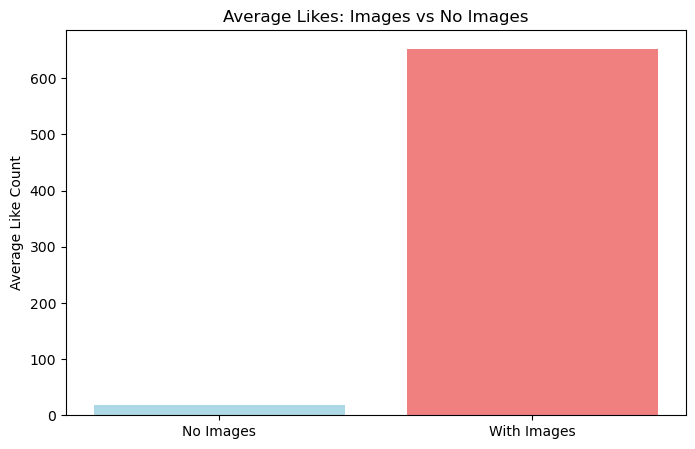

In [4]:

image_likes = df[df['has_images']]['like_count'].mean()
no_image_likes = df[~df['has_images']]['like_count'].mean()

print(f"Average likes - Posts WITH images: {image_likes:.1f}")
print(f"Average likes - Posts WITHOUT images: {no_image_likes:.1f}")
print(f"Difference: {image_likes - no_image_likes:.1f} likes")


plt.figure(figsize=(8, 5))
plt.bar(['No Images', 'With Images'], [no_image_likes, image_likes], 
        color=['lightblue', 'lightcoral'])
plt.title('Average Likes: Images vs No Images')
plt.ylabel('Average Like Count')
plt.show()

In [5]:
summary = df.groupby('has_images').agg({
    'like_count': ['count', 'mean', 'median']
}).round(1)

print("\nSummary Statistics:")
print(summary)


Summary Statistics:
           like_count              
                count   mean median
has_images                         
False              48   18.5    1.0
True              205  652.9  109.0


Conclusion
Based on the data from 3 Bluesky users:
Posts with images averaged 652.9 likes
Posts without images averaged 18.5 likes
This shows that images do increase engagement

Limitations
Small sample size (only 3 users)
Can't control for post quality
Different users have different posting styles